In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from sklearn.metrics import mean_absolute_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook/notebook
https://www.kaggle.com/code/abdallahsaadelgendy/diabetes-prediction-eda-preprocessing-models/notebook
https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system

In [2]:
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

About Columns :

Diabetes_binary : you have diabetes (0,1)

HighBP : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

HighChol : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

CholCheck : Cholesterol check within past five years (0,1)

BMI : Body Mass Index (BMI)

Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

Stroke : (Ever told) you had a stroke. (0,1)

HeartDiseaseorAttack : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

PhysActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

Fruits : Consume Fruit 1 or more times per day (0,1)

Veggies : Consume Vegetables 1 or more times per day (0,1)

HvyAlcoholConsump : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

AnyHealthcare : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

GenHlth : Would you say that in general your health is: rate (1 ~ 5)

MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

PhysHlth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

DiffWalk : Do you have serious difficulty walking or climbing stairs? (0,1)

Sex : Indicate sex of respondent (0,1) (Female or Male)

Age : Fourteen-level age category (1 ~ 14)

Education : What is the highest grade or year of school you completed? (1 ~ 6)

Income : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

In [4]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [5]:
profile = ProfileReport(data)

In [ ]:
profile

In [6]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [8]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [10]:
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [11]:
v_counts(data)

0    218334
1     35346
Name: Diabetes_binary, dtype: int64
_____________________________________________________________________________
0    144851
1    108829
Name: HighBP, dtype: int64
_____________________________________________________________________________
0    146089
1    107591
Name: HighChol, dtype: int64
_____________________________________________________________________________
1    244210
0      9470
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: BMI, Length: 84, dtype: int64
_____________________________________________________________________________
0    141257
1    112423
Name: Smoker, dtype: int64
_____________________________________________________________________________
0    243388
1     10292
Name: Stroke, dtype: int64
____________________________________________

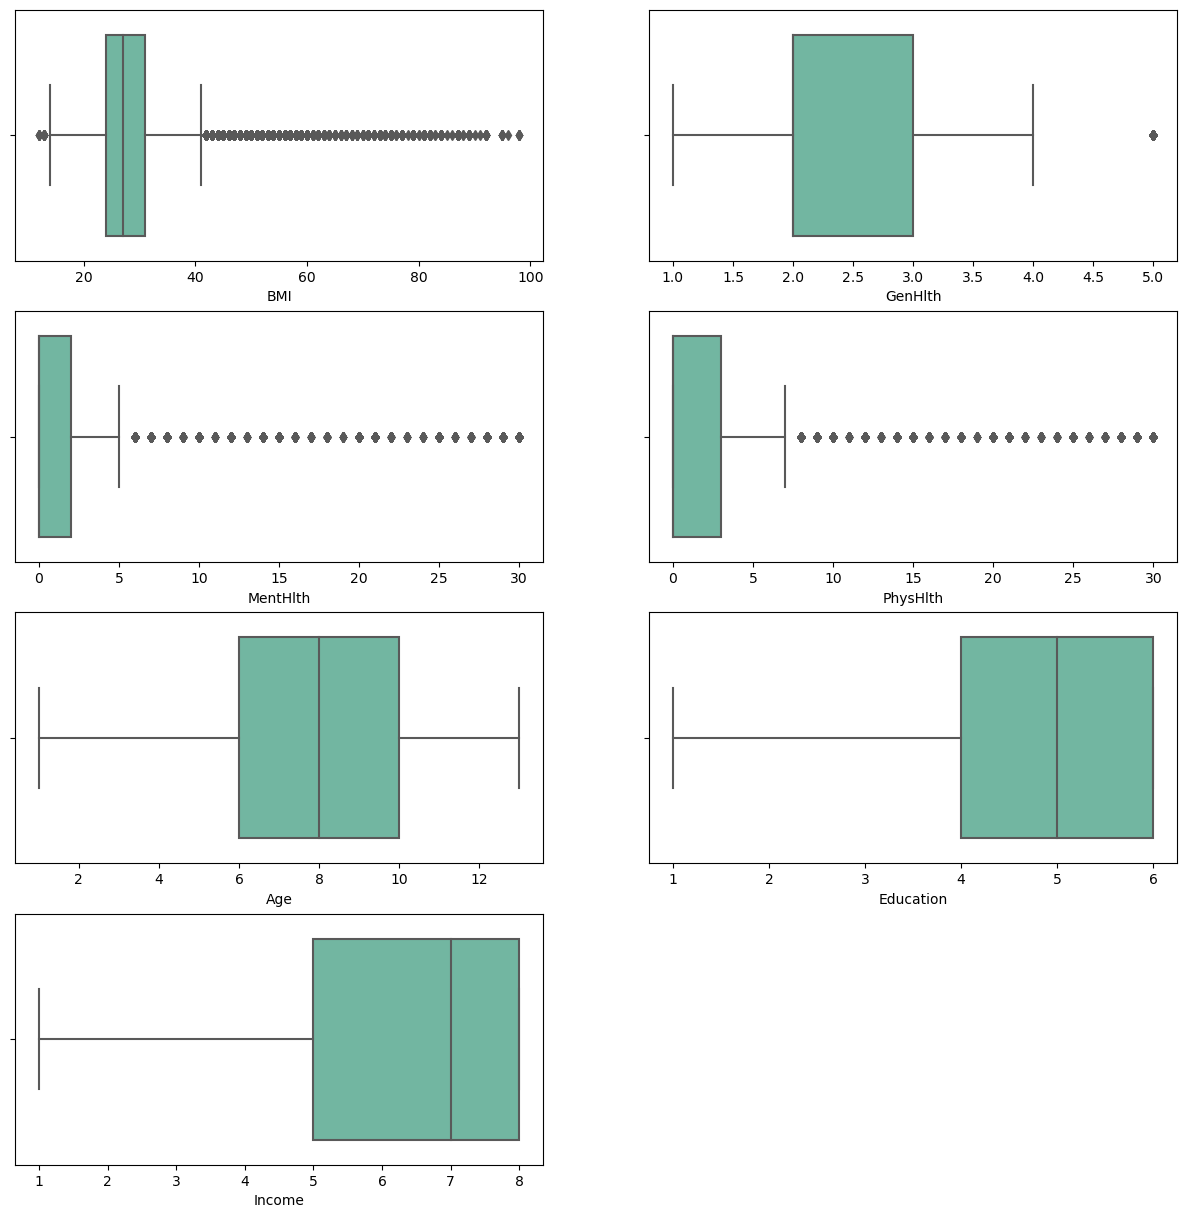

In [12]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

In [13]:
data.duplicated().sum()

24206

In [14]:
data.drop_duplicates(inplace = True)

In [15]:
# data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"NOn-Diabetic",1:"Diabetic" })

In [16]:
data2 = data.copy() 

In [17]:
data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

In [18]:
data2

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,40,Yes,No,No,No,No,...,Yes,No,Excellent,18,15,Yes,Female,60 to 64,Senior High School,"Less Than $10,000"
1,No Diabetes,No High,No High Cholesterol,No Cholesterol Check in 5 Years,25,Yes,No,No,Yes,No,...,No,Yes,Good,0,0,No,Female,50 to 54,Magister,"Less Than $10,000"
2,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,28,No,No,No,No,Yes,...,Yes,Yes,Excellent,30,30,Yes,Female,60 to 64,Senior High School,"$75,000 or More"
3,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,27,No,No,No,Yes,Yes,...,Yes,No,Fair,0,0,No,Female,70 to 74,Junior High School,"Less Than $35,000"
4,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,24,No,No,No,Yes,Yes,...,Yes,No,Fair,3,0,No,Female,70 to 74,Undergraduate Degree,"Less Than $10,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,45,No,No,No,No,Yes,...,Yes,No,Good,0,5,No,Male,40 to 44,Magister,"Less Than $35,000"
253676,Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,18,No,No,No,No,No,...,Yes,No,Very Good,0,0,Yes,Female,70 to 74,Elementary,"Less Than $10,000"
253677,No Diabetes,No High,No High Cholesterol,Cholesterol Check in 5 Years,28,No,No,No,Yes,Yes,...,Yes,No,Poor,0,0,No,Female,25 to 29,Undergraduate Degree,"Less Than $10,000"
253678,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,23,No,No,No,No,Yes,...,Yes,No,Good,0,0,No,Male,50 to 54,Undergraduate Degree,"Less Than $10,000"


In [19]:
# feature selection ka code bhi denge

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  int64
 1   HighBP                229474 non-null  int64
 2   HighChol              229474 non-null  int64
 3   CholCheck             229474 non-null  int64
 4   BMI                   229474 non-null  int64
 5   Smoker                229474 non-null  int64
 6   Stroke                229474 non-null  int64
 7   HeartDiseaseorAttack  229474 non-null  int64
 8   PhysActivity          229474 non-null  int64
 9   Fruits                229474 non-null  int64
 10  Veggies               229474 non-null  int64
 11  HvyAlcoholConsump     229474 non-null  int64
 12  AnyHealthcare         229474 non-null  int64
 13  NoDocbcCost           229474 non-null  int64
 14  GenHlth               229474 non-null  int64
 15  MentHlth              229474 non-n

In [21]:
data["Diabetes_binary"]

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    1
253677    0
253678    0
253679    1
Name: Diabetes_binary, Length: 229474, dtype: int64

In [22]:
X=data.drop("Diabetes_binary",axis=1)
y=data["Diabetes_binary"]

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# skf = StratifiedKFold(n_splits=3) # 3 fold as asked in the question
# skf_scores = cross_val_score(model, X, y, cv=skf)

# model_rf = DecisionTreeClassifier(,random_state=69)
# skf = StratifiedKFold(n_splits=2) 
# skf_scores_rf = cross_val_score(model_dt, X, y, cv=skf,scoring='roc_auc')
# print(skf_scores_rf.mean())


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state =69)

In [25]:
# dt_model = DecisionTreeClassifier( criterion='gini', splitter='best', 
#                                   max_depth=None, min_samples_split=2, 
#                                   min_samples_leaf=10, min_weight_fraction_leaf=0.0, 
#                                   max_features='auto', random_state=69,
#                                   max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                                   class_weight='balanced', ccp_alpha=0.0)

In [26]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [27]:
for num in range(2,20):
    dtc = DecisionTreeClassifier( criterion='gini', splitter='best', 
                                  max_depth=12, min_samples_split=2, 
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', random_state=69,
                                  max_leaf_nodes=num, min_impurity_decrease=0.0, 
                                  class_weight='balanced', ccp_alpha=0.0)
    dtc.fit(x_train,y_train)
    pred = dtc.predict(x_test)
    
    print('For max_leaf_nodes = %s' % num)
    print('F1 Score',f1_score(pred,y_test))
    print('AccuracyScore', accuracy_score(pred,y_test))
    print('Recall',recall_score(pred,y_test))
    print('Precision',precision_score(pred,y_test))
    print('Clusters = ',np.unique(pred))
    print()

For max_leaf_nodes = 2
F1 Score 0.3781548798346111
AccuracyScore 0.6224964702191079
Recall 0.2526570233664582
Precision 0.751369237790963
Clusters =  [0 1]

For max_leaf_nodes = 3
F1 Score 0.3781548798346111
AccuracyScore 0.6224964702191079
Recall 0.2526570233664582
Precision 0.751369237790963
Clusters =  [0 1]

For max_leaf_nodes = 4
F1 Score 0.3781548798346111
AccuracyScore 0.6224964702191079
Recall 0.2526570233664582
Precision 0.751369237790963
Clusters =  [0 1]

For max_leaf_nodes = 5
F1 Score 0.3781548798346111
AccuracyScore 0.6224964702191079
Recall 0.2526570233664582
Precision 0.751369237790963
Clusters =  [0 1]

For max_leaf_nodes = 6
F1 Score 0.40490918016691213
AccuracyScore 0.6830518224128014
Recall 0.2838786655041072
Precision 0.7058420812414422
Clusters =  [0 1]

For max_leaf_nodes = 7
F1 Score 0.4016228364612825
AccuracyScore 0.6426467255835033
Recall 0.26983566694120875
Precision 0.7850296668188042
Clusters =  [0 1]

For max_leaf_nodes = 8
F1 Score 0.4016228364612825
Acc

In [28]:
# model_rf = DecisionTreeClassifier(,random_state=69)
# skf = StratifiedKFold(n_splits=2) 
# skf_scores_rf = cross_val_score(model_dt, X, y, cv=skf,scoring='roc_auc')
# print(skf_scores_rf.mean())

In [29]:
num = 14
dtc = DecisionTreeClassifier( criterion='gini', splitter='best', 
                                  max_depth=None, min_samples_split=2, 
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', random_state=69,
                                  max_leaf_nodes=num, min_impurity_decrease=0.0, 
                                  class_weight='balanced', ccp_alpha=0.0)

skf = StratifiedKFold(n_splits=2) 
skf_scores_rf = cross_val_score(dtc, X, y, cv=skf,scoring='roc_auc')
print(skf_scores_rf.mean())



dtc.fit(X,y)

0.7544565479903902


DecisionTreeClassifier(class_weight='balanced', max_features='auto',
                       max_leaf_nodes=14, min_samples_leaf=5, random_state=69)

In [30]:
feats = X.columns

In [31]:
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_13 <= 2.50
|   |   |--- feature_18 <= 8.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_18 >  8.50
|   |   |   |--- class: 0
|   |--- feature_13 >  2.50
|   |   |--- feature_13 <= 3.50
|   |   |   |--- feature_14 <= 0.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_14 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_13 >  3.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_6 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_13 <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_13 >  2.50
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--

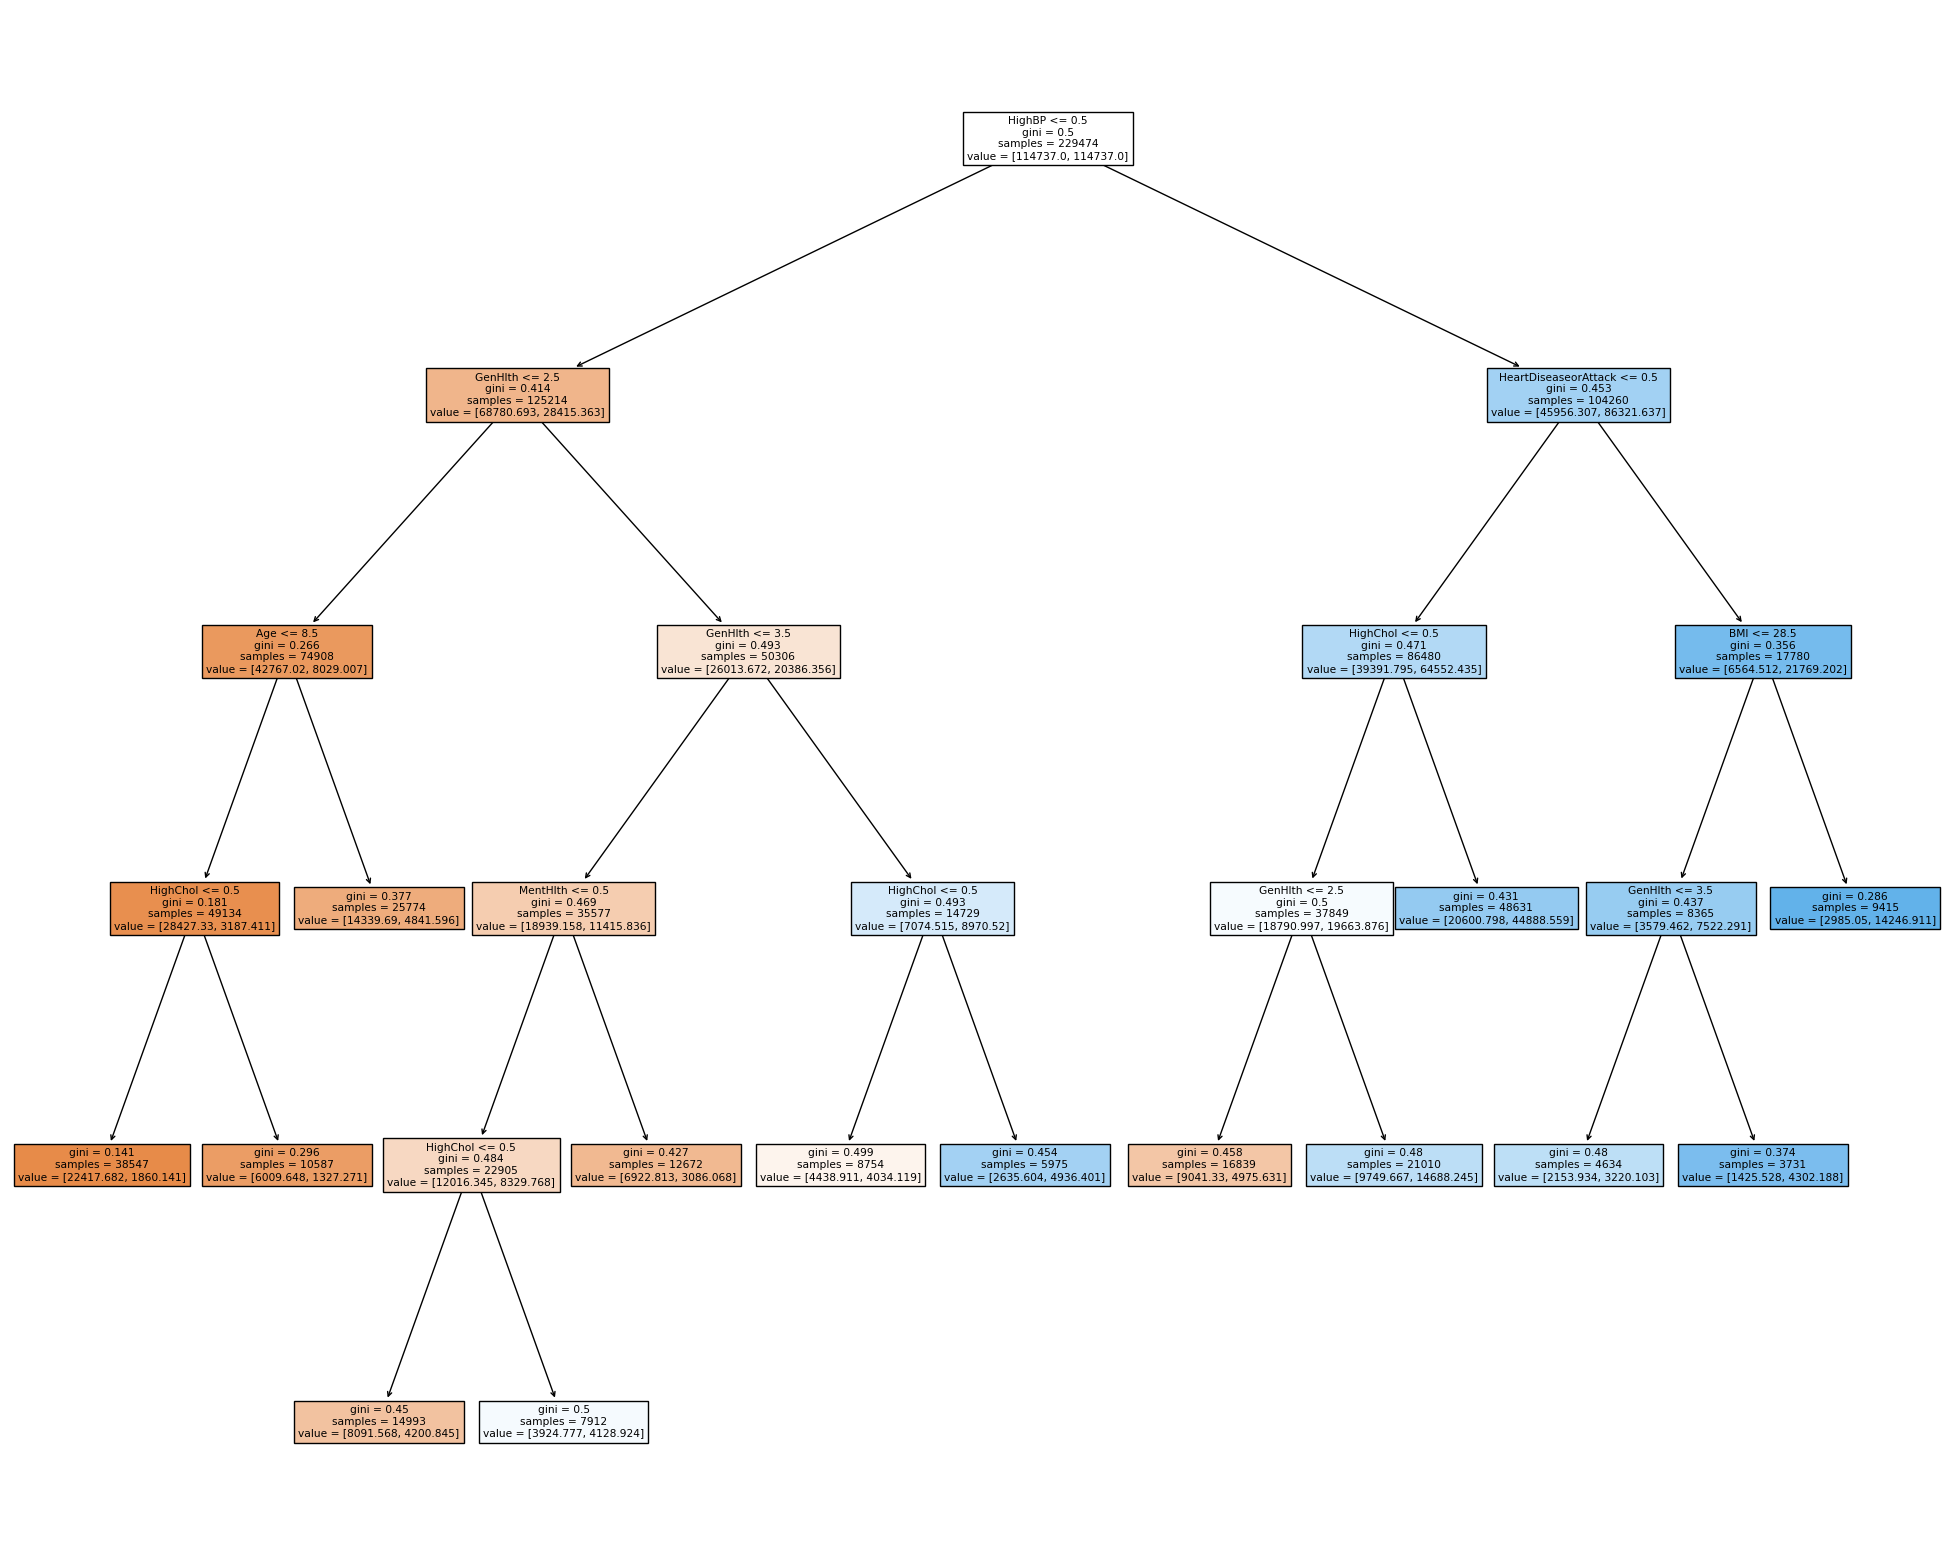

In [32]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, feature_names=feats,filled=True)

In [33]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = ""
        for p in path[:-1]:
            if rule != "":
                rule += " & "
            rule += str(p.strip('()'))
        rules += [rule]
        
    return rules

In [34]:
clustering_df = x_train.copy()
clustering_df['LabelOfCluster'] = -1

In [45]:
from sklearn.tree import _tree
rules = get_rules(dtc, feats, None)
i =1
for r in rules:
    print(" Cluster " + str(i) + "-> " + r)
    i = i+1

 Cluster 1-> HighBP > 0.5 & HeartDiseaseorAttack <= 0.5 & HighChol > 0.5
 Cluster 2-> HighBP <= 0.5 & GenHlth <= 2.5 & Age <= 8.5 & HighChol <= 0.5
 Cluster 3-> HighBP <= 0.5 & GenHlth <= 2.5 & Age > 8.5
 Cluster 4-> HighBP > 0.5 & HeartDiseaseorAttack <= 0.5 & HighChol <= 0.5 & GenHlth > 2.5
 Cluster 5-> HighBP > 0.5 & HeartDiseaseorAttack <= 0.5 & HighChol <= 0.5 & GenHlth <= 2.5
 Cluster 6-> HighBP <= 0.5 & GenHlth > 2.5 & GenHlth <= 3.5 & MentHlth <= 0.5 & HighChol <= 0.5
 Cluster 7-> HighBP <= 0.5 & GenHlth > 2.5 & GenHlth <= 3.5 & MentHlth > 0.5
 Cluster 8-> HighBP <= 0.5 & GenHlth <= 2.5 & Age <= 8.5 & HighChol > 0.5
 Cluster 9-> HighBP > 0.5 & HeartDiseaseorAttack > 0.5 & BMI > 28.5
 Cluster 10-> HighBP <= 0.5 & GenHlth > 2.5 & GenHlth > 3.5 & HighChol <= 0.5
 Cluster 11-> HighBP <= 0.5 & GenHlth > 2.5 & GenHlth <= 3.5 & MentHlth <= 0.5 & HighChol > 0.5
 Cluster 12-> HighBP <= 0.5 & GenHlth > 2.5 & GenHlth > 3.5 & HighChol > 0.5
 Cluster 13-> HighBP > 0.5 & HeartDiseaseorAttack

In [36]:
#%%timeit
rules = get_rules(dtc, feats, None)
i=0
final_df = pd.DataFrame()
for r in rules:
    temp_df = clustering_df.query(r)
    temp_df['LabelOfCluster'].replace(-1, i, inplace=True)
    final_df = final_df.append(temp_df)
    i=i+1

In [37]:
final_df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,LabelOfCluster
142130,1,1,1,35,1,0,0,1,1,1,...,0,3,6,5,0,1,8,5,8,0
171849,1,1,1,32,1,0,0,1,0,1,...,0,3,2,0,1,0,10,4,6,0
85242,1,1,1,27,1,0,0,0,0,0,...,0,2,0,0,0,0,10,4,3,0
197431,1,1,1,29,0,0,0,1,1,1,...,0,2,0,0,0,1,3,6,8,0
17879,1,1,1,27,1,0,0,1,1,1,...,0,1,0,0,0,1,9,6,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141672,1,0,1,28,1,0,1,0,0,1,...,0,4,0,4,1,1,13,5,5,13
210247,1,1,1,26,1,0,1,1,0,1,...,0,4,0,0,0,1,9,6,4,13
177137,1,1,1,28,1,0,1,1,0,1,...,0,5,0,5,0,1,11,5,7,13
23249,1,1,1,27,1,0,1,1,0,1,...,0,5,0,30,1,0,13,5,5,13


In [38]:
# sell mdeical insurance 
# sell diabetes kit
# sell docotos appointment
# sell insulin 
# sell vitamins eatebles 
# sell weight loose machine